### Importing Libraries

In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import pandas as pd
import numpy as np

# Randomized Hill Climbing

### k-color for Randomized Hill Climbing

In [2]:
def k_color_fitness(state, graph):
    """
    Calculate the fitness of the given state for the k-color problem.
    
    Args:
    - state (list): A list representing the state to evaluate. Each element represents
                    the color assigned to the corresponding node in the graph.
    - graph (list of sets): A list of sets representing the graph. Each set contains the
                            neighbors of a node in the graph.
                            
    Returns:
    - The fitness value of the state, which is the number of nodes in the graph that do not
      have the same color as all of their neighbors.
    """
    fitness = 0
    for node, neighbors in enumerate(graph):
        if all(state[neighbor] != state[node] for neighbor in neighbors):
            fitness += 1
    return fitness

def random_neighbor(state):
    """
    Generate a random neighbor of the given state for the k-color problem.
    Args:
    - state (list): A list representing the state to generate a neighbor for.
    
    Returns:
    - A new list representing a random neighbor of the given state. The new state
      differs from the given state in exactly one element.
    """
    neighbor = state.copy()
    idx = random.randint(0, len(state) - 1)
    colors = set(range(1, k+1)) - {neighbor[idx]}
    neighbor[idx] = random.choice(list(colors))
    return neighbor

def randomized_hill_climbing_k_color(k, graph, max_iter=10000):
    """
    Use randomized hill climbing to solve the k-color problem.
    
    Args:
    - k (int): The number of colors to use for the k-color problem.
    - graph (list of sets): A list of sets representing the graph. Each set contains the
                            neighbors of a node in the graph.
    - max_iter (int): The maximum number of iterations to perform before giving up.
    
    Returns:
    - A tuple containing the best state found and its fitness value.
    """
    current = [random.randint(1, k) for _ in range(len(graph))]
    fitness = k_color_fitness(current, graph)
    for i in range(max_iter):
        neighbor = random_neighbor(current)
        neighbor_fitness = k_color_fitness(neighbor, graph)
        if neighbor_fitness > fitness:
            current = neighbor
            fitness = neighbor_fitness
    return current, fitness



In [3]:
# Test the algorithm on a simple k-color problem with 5 nodes and 3 colors
k = 3
graph = [
    {0, 2},
    {0, 2, 3},
    {0, 1, 4},
    {1, 4},
    {2, 3},
    {0,1,2,3,4,5}
]

best_state, best_fitness = randomized_hill_climbing_k_color(k, graph)
print("Best state found:", best_state)
print("Best fitness found:", best_fitness)


Best state found: [1, 2, 3, 1, 2, 2]
Best fitness found: 4


In [4]:

fitness_nodes=[]
k = 3
for total_nodes in range(4,100,10):
    graph=[]
    print("Total Number of Nodes ", total_nodes," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
        
    best_state, best_fitness = randomized_hill_climbing_k_color(k, graph)
    print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,total_nodes])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total Number of Nodes  4  with  3  colors
Best state found: [3, 1, 1, 3]
Best fitness found: 2

Total Number of Nodes  14  with  3  colors
Best state found: [2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3]
Best fitness found: 3

Total Number of Nodes  24  with  3  colors
Best state found: [2, 1, 2, 3, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3]
Best fitness found: 6

Total Number of Nodes  34  with  3  colors
Best state found: [1, 3, 2, 3, 1, 2, 2, 2, 1, 2, 3, 1, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 1, 1, 2, 3, 1, 2]
Best fitness found: 9

Total Number of Nodes  44  with  3  colors
Best state found: [3, 3, 1, 3, 3, 2, 1, 2, 2, 1, 3, 2, 3, 1, 1, 2, 2, 2, 2, 1, 2, 1, 3, 3, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 3, 2, 1, 2, 1, 3, 2, 3]
Best fitness found: 7

Total Number of Nodes  54  with  3  colors
Best state found: [1, 3, 2, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 3, 1, 3, 2, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 2, 1, 1, 2, 3, 2, 3, 2, 1, 1, 3, 1

## Total Nodes vs Fitness with K=3 colors 

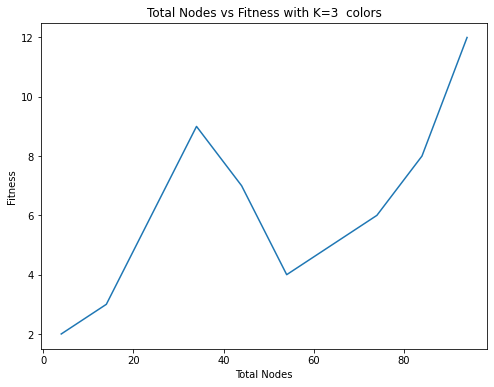

In [5]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total Nodes vs Fitness with K=3  colors')
plt.xlabel('Total Nodes')
plt.ylabel('Fitness')

# Display plot
plt.show()

## Total Nodes vs Fitness with K=10 colors 

In [6]:

fitness_nodes=[]
k = 10
for total_nodes in range(4,100,10):
    graph=[]
    print("Total Number of Nodes ", total_nodes," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
        
    best_state, best_fitness = randomized_hill_climbing_k_color(k, graph)
    #print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,total_nodes])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total Number of Nodes  4  with  10  colors
Best fitness found: 2

Total Number of Nodes  14  with  10  colors
Best fitness found: 9

Total Number of Nodes  24  with  10  colors
Best fitness found: 11

Total Number of Nodes  34  with  10  colors
Best fitness found: 11

Total Number of Nodes  44  with  10  colors
Best fitness found: 15

Total Number of Nodes  54  with  10  colors
Best fitness found: 22

Total Number of Nodes  64  with  10  colors
Best fitness found: 18

Total Number of Nodes  74  with  10  colors
Best fitness found: 27

Total Number of Nodes  84  with  10  colors
Best fitness found: 27

Total Number of Nodes  94  with  10  colors
Best fitness found: 28



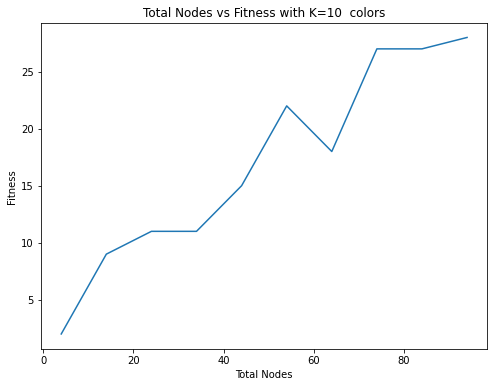

In [7]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total Nodes vs Fitness with K=10  colors')
plt.xlabel('Total Nodes')
plt.ylabel('Fitness')

# Display plot
plt.show()

## Total Nodes vs Fitness with K=20 colors 

In [8]:

fitness_nodes=[]
k = 20
for total_nodes in range(4,100,10):
    graph=[]
    print("Total Number of Nodes ", total_nodes," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
        
    best_state, best_fitness = randomized_hill_climbing_k_color(k, graph)
    #print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,total_nodes])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total Number of Nodes  4  with  20  colors
Best fitness found: 3

Total Number of Nodes  14  with  20  colors
Best fitness found: 6

Total Number of Nodes  24  with  20  colors
Best fitness found: 13

Total Number of Nodes  34  with  20  colors
Best fitness found: 16

Total Number of Nodes  44  with  20  colors
Best fitness found: 31

Total Number of Nodes  54  with  20  colors
Best fitness found: 24

Total Number of Nodes  64  with  20  colors
Best fitness found: 31

Total Number of Nodes  74  with  20  colors
Best fitness found: 32

Total Number of Nodes  84  with  20  colors
Best fitness found: 35

Total Number of Nodes  94  with  20  colors
Best fitness found: 38



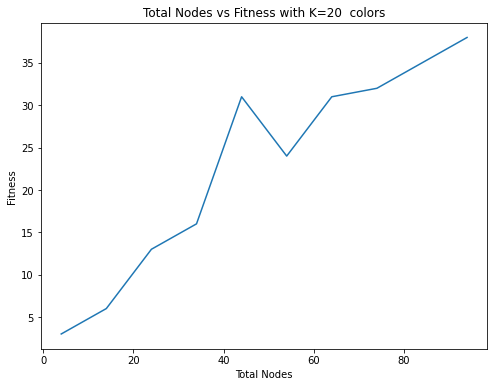

In [9]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])
# Set plot title and axis labels
plt.title('Total Nodes vs Fitness with K=20  colors')
plt.xlabel('Total Nodes')
plt.ylabel('Fitness')
# Display plot
plt.show()

## 4-peaks in randomized hill climbing

In [10]:
import random

# function to calculate the fitness value of the bit string
def calculate_fitness(bit_string):
    n = len(bit_string)
    leading_zeros = 0
    trailing_ones = 0

    for i in range(n):
        if bit_string[i] == '0':
            leading_zeros += 1
        else:
            break

    for i in range(n-1, -1, -1):
        if bit_string[i] == '1':
            trailing_ones += 1
        else:
            break

    if leading_zeros == n:
        return n
    elif trailing_ones == n:
        return n
    else:
        return max(leading_zeros, trailing_ones)

# function to generate random bit string of given length
def generate_bit_string(length):
    return [random.choice(['0', '1']) for _ in range(length)]

# function to generate a neighbor of the given bit string by flipping a random bit
def generate_neighbor(bit_string):
    neighbor = bit_string.copy()
    index = random.randint(0, len(bit_string) - 1)
    neighbor[index] = '1' if neighbor[index] == '0' else '0'
    return neighbor

# implementation of randomized hill climbing on the 4-peaks optimization problem
def randomized_hill_climbing_4peaks(length):
    # generate initial random bit string
    current = generate_bit_string(length)
    # evaluate the fitness of initial bit string
    current_fitness = calculate_fitness(current)

    # loop until max fitness is achieved or max iterations are reached
    max_fitness = length
    iterations = 0
    while current_fitness < max_fitness and iterations < 1000:
        # generate a random neighbor of the current bit string
        neighbor = generate_neighbor(current)
        # evaluate the fitness of the neighbor
        neighbor_fitness = calculate_fitness(neighbor)

        # if neighbor has higher fitness, update current bit string
        if neighbor_fitness > current_fitness:
            current = neighbor
            current_fitness = neighbor_fitness

        iterations += 1

    return current, current_fitness



### Testing the randomized hill climbing algorithm on the 4-peaks optimization problem

In [11]:
# testing the randomized hill climbing algorithm on the 4-peaks optimization problem
bit_string_length = 50
bit_string, fitness = randomized_hill_climbing_4peaks(bit_string_length)
print("Optimal Bit String: ", bit_string)
print("Fitness: ", fitness)

Optimal Bit String:  ['1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Fitness:  47


### 4-peaks optimization problem: Fitness vs  Bit Length

In [12]:
total_fitness=[]

for bit_string_length in range(5,100,10):
    
    bit_string, fitness = randomized_hill_climbing_4peaks(bit_string_length)
    total_fitness.append([bit_string_length,fitness])
    #print("Optimal Bit String: ", bit_string)
    print("Fitness: ", fitness)
    print()
    
total_fitness=np.array(total_fitness)

Fitness:  5

Fitness:  15

Fitness:  25

Fitness:  35

Fitness:  45

Fitness:  36

Fitness:  15

Fitness:  43

Fitness:  36

Fitness:  25



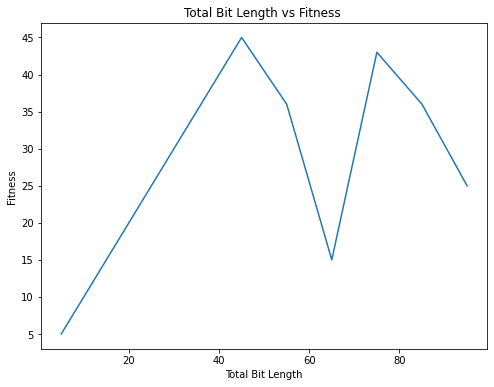

In [13]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=total_fitness[:,0], y=total_fitness[:,1])
# Set plot title and axis labels
plt.title('Total Bit Length vs Fitness ')
plt.xlabel('Total Bit Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

## One Max vs Deceptive One Max vs Trap

In [14]:


# Implementation of the Randomized Hill Climbing algorithm
def randomized_hill_climbing(max_iterations, problem_size, objective_function):
    # Initialize the current solution to a random bit string
    current_solution = [random.randint(0, 1) for _ in range(problem_size)]
    
    # Loop until max_iterations or until we find the optimal solution
    for i in range(max_iterations):
        # Evaluate the objective function for the current solution
        current_fitness = objective_function(current_solution)
        
        # Generate a random neighbor by flipping a random bit
        neighbor = current_solution.copy()
        bit_to_flip = random.randint(0, problem_size-1)
        neighbor[bit_to_flip] = 1 - neighbor[bit_to_flip]
        
        # Evaluate the objective function for the neighbor
        neighbor_fitness = objective_function(neighbor)
        
        # If the neighbor has a better fitness, move to the neighbor
        if neighbor_fitness > current_fitness:
            current_solution = neighbor
        
        # If we have found the optimal solution, stop searching
        if current_fitness == problem_size:
            break
    
    # Return the best solution found
    return current_solution

# Example problem 1: One Max
def one_max(bit_string):
    return sum(bit_string)

# Example problem 2: Deceptive One Max
def deceptive_one_max(bit_string):
    fitness = sum(bit_string)
    if fitness == len(bit_string):
        fitness = -1
    return fitness

# Example problem 3: Trap
def trap(bit_string, block_size=5):
    fitness = 0
    for i in range(0, len(bit_string), block_size):
        block = bit_string[i:i+block_size]
        if sum(block) == block_size:
            fitness += block_size
        else:
            fitness += block_size - sum(block) - 1
    return fitness

# Example usage
if __name__ == '__main__':
    max_iterations = 1000
    problem_size = 50
    
    # Example problem 1: One Max
    print('Example problem 1: One Max')
    solution = randomized_hill_climbing(max_iterations, problem_size, one_max)
    print('Solution:', solution)
    print('Fitness:', one_max(solution))
    
    # Example problem 2: Deceptive One Max
    print('Example problem 2: Deceptive One Max')
    solution = randomized_hill_climbing(max_iterations, problem_size, deceptive_one_max)
    print('Solution:', solution)
    print('Fitness:', deceptive_one_max(solution))
    
    # Example problem 3: Trap
    print('Example problem 3: Trap')
    solution = randomized_hill_climbing(max_iterations, problem_size, lambda x: trap(x, 5))
    print('Solution:', solution)
    print('Fitness:', trap(solution, 5))


Example problem 1: One Max
Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness: 50
Example problem 2: Deceptive One Max
Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness: 49
Example problem 3: Trap
Solution: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Fitness: 42


In [15]:
max_iterations, problem_size, one_max

(1000, 50, <function __main__.one_max(bit_string)>)

In [16]:

one_max_list=[]
deceptive_one_list=[]
trap_list=[]
size_list=[]

for problem_size in range(100,5000,500):
    max_iterations = 1000
    print("Problem_size", problem_size)
    print()
    # Example problem 1: One Max
    print('problem 1: One Max')
    solution = randomized_hill_climbing(max_iterations, problem_size, one_max)
    
    #print('Solution:', solution)
    print('Fitness:', one_max(solution))
    one_max_list.append(one_max(solution))
    
    # Example problem 2: Deceptive One Max
    print('problem 2: Deceptive One Max')
    solution = randomized_hill_climbing(max_iterations, problem_size, deceptive_one_max)
    #print('Solution:', solution)
    print('Fitness:', deceptive_one_max(solution))
    deceptive_one_list.append(deceptive_one_max(solution))
    
    # Example problem 3: Trap
    print('problem 3: Trap')
    solution = randomized_hill_climbing(max_iterations, problem_size, lambda x: trap(x, 5))
    #print('Solution:', solution)
    print('Fitness:', trap(solution, 5))
    trap_list.append(  trap(solution, 5))
    size_list.append(problem_size)
    print()
    print()
    print()


Problem_size 100

problem 1: One Max
Fitness: 100
problem 2: Deceptive One Max
Fitness: 99
problem 3: Trap
Fitness: 80



Problem_size 600

problem 1: One Max
Fitness: 551
problem 2: Deceptive One Max
Fitness: 543
problem 3: Trap
Fitness: 447



Problem_size 1100

problem 1: One Max
Fitness: 874
problem 2: Deceptive One Max
Fitness: 875
problem 3: Trap
Fitness: 688



Problem_size 1600

problem 1: One Max
Fitness: 1158
problem 2: Deceptive One Max
Fitness: 1179
problem 3: Trap
Fitness: 939



Problem_size 2100

problem 1: One Max
Fitness: 1439
problem 2: Deceptive One Max
Fitness: 1489
problem 3: Trap
Fitness: 1109



Problem_size 2600

problem 1: One Max
Fitness: 1728
problem 2: Deceptive One Max
Fitness: 1723
problem 3: Trap
Fitness: 1291



Problem_size 3100

problem 1: One Max
Fitness: 1982
problem 2: Deceptive One Max
Fitness: 1956
problem 3: Trap
Fitness: 1499



Problem_size 3600

problem 1: One Max
Fitness: 2208
problem 2: Deceptive One Max
Fitness: 2307
problem 3: Trap
Fitness

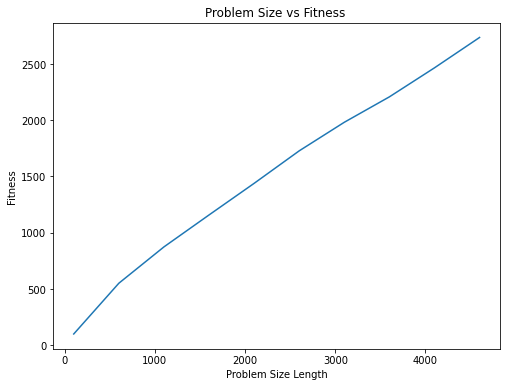

In [17]:



plt.figure(figsize=(8, 6))
sns.lineplot(x=size_list, y=one_max_list)
# Set plot title and axis labels
plt.title('Problem Size vs Fitness ')
plt.xlabel('Problem Size Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

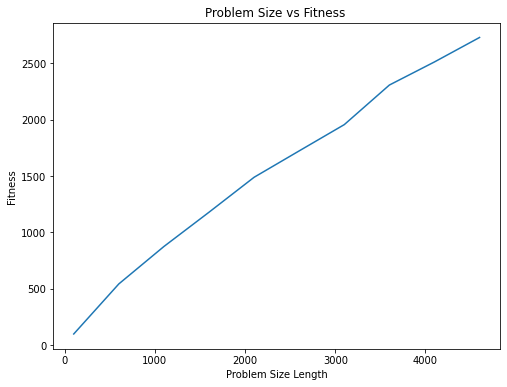

In [18]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=size_list, y=deceptive_one_list)
# Set plot title and axis labels
plt.title('Problem Size vs Fitness ')
plt.xlabel('Problem Size Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

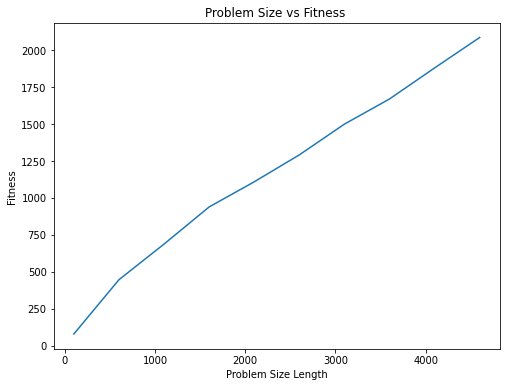

In [19]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=size_list, y=trap_list)
# Set plot title and axis labels
plt.title('Problem Size vs Fitness ')
plt.xlabel('Problem Size Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

# Simulated annealing

In [74]:
import random
import math

def fitness(coloring, graph):
    total = 0
    
    
    
    
    for node in graph:
        #for neighbor in graph[node]:
            if all(coloring[neighbor] != coloring[node] for neighbor in graph[node]):
                total += 1
                
    return total

def simulated_annealing(graph, k, initial_temp=1000, cooling_rate=0.003, max_iterations=10000):
    # Initialize random coloring
    coloring = {}
    nodes = list(graph.keys())
    for node in nodes:
        coloring[node] = random.randint(0, k-1)
        
    current_cost = fitness(coloring, graph)
    best_coloring = coloring.copy()
    best_cost = current_cost
    
    # Simulated Annealing
    temperature = initial_temp
    for i in range(max_iterations):
        # Decrease temperature
        temperature *= 1 - cooling_rate
        
        # Choose a random neighbor
        node = random.choice(nodes)
        neighbor_color = (coloring[node] + random.randint(1, k-1)) % k
        neighbor = coloring.copy()
        neighbor[node] = neighbor_color
        
        # Calculate cost and delta
        neighbor_cost = fitness(neighbor, graph)
        delta = neighbor_cost - current_cost
        
        # Accept neighbor if it improves the cost
        if delta <= 0 or math.exp(-delta/temperature) > random.random():
            coloring = neighbor.copy()
            current_cost = neighbor_cost
            
            if current_cost >best_cost:
                best_coloring = coloring.copy()
                best_cost = current_cost
    print(best_cost)
    return best_coloring, best_cost


graph = {
    0: [1, 2],
    1: [0, 2, 3],
    2: [0, 1, 3],
    3: [1, 2, 4],
    4: [3, 5],
    5: [4]
}

k = 3

best_coloring, best_cost = simulated_annealing(graph, k)
print("Best coloring:", best_coloring)
print("Best Fitness:", best_cost)


6
Best coloring: {0: 0, 1: 2, 2: 1, 3: 0, 4: 1, 5: 2}
Best Fitness: 6


## Total Nodes vs Fitness with K=3 colors 

In [75]:

fitness_nodes=[]
k = 2
for total_nodes in range(4,100,10):
    graph={}
    print("Total Number of Nodes ", total_nodes," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph[i]=(nodes)
        
    best_state, best_fitness = simulated_annealing(graph, k)
    #print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,total_nodes])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total Number of Nodes  4  with  2  colors
1
Best fitness found: 1

Total Number of Nodes  14  with  2  colors
3
Best fitness found: 3

Total Number of Nodes  24  with  2  colors
5
Best fitness found: 5

Total Number of Nodes  34  with  2  colors
2
Best fitness found: 2

Total Number of Nodes  44  with  2  colors
3
Best fitness found: 3

Total Number of Nodes  54  with  2  colors
3
Best fitness found: 3

Total Number of Nodes  64  with  2  colors
4
Best fitness found: 4

Total Number of Nodes  74  with  2  colors
2
Best fitness found: 2

Total Number of Nodes  84  with  2  colors
3
Best fitness found: 3

Total Number of Nodes  94  with  2  colors
3
Best fitness found: 3



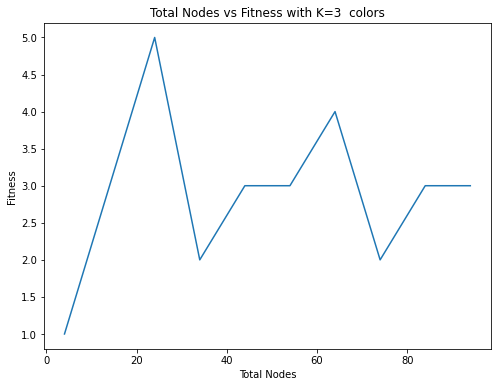

In [76]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total Nodes vs Fitness with K=3  colors')
plt.xlabel('Total Nodes')
plt.ylabel('Fitness')

# Display plot
plt.show()

## Total Nodes vs Fitness with K=20 colors 

In [77]:

fitness_nodes=[]
k = 20
for total_nodes in range(4,50,10):
    graph={}
    print("Total Number of Nodes ", total_nodes," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph[i]=(nodes)
        
    best_state, best_fitness = simulated_annealing(graph, k)
    #print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,total_nodes])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total Number of Nodes  4  with  20  colors
3
Best fitness found: 3

Total Number of Nodes  14  with  20  colors
7
Best fitness found: 7

Total Number of Nodes  24  with  20  colors
15
Best fitness found: 15

Total Number of Nodes  34  with  20  colors
17
Best fitness found: 17

Total Number of Nodes  44  with  20  colors
17
Best fitness found: 17



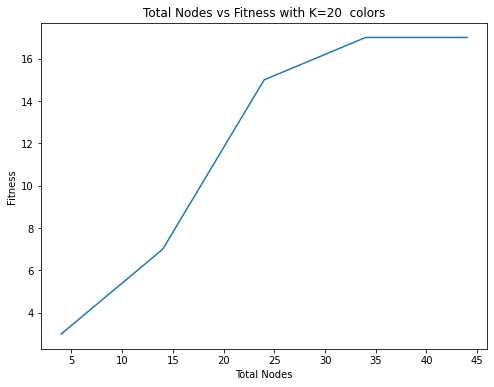

In [78]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total Nodes vs Fitness with K=20  colors')
plt.xlabel('Total Nodes')
plt.ylabel('Fitness')

# Display plot
plt.show()

### 4-peaks

In [25]:
import random
import math

def random_bitstring(size):
    return [random.choice(['0', '1']) for _ in range(size)]

def flip_bit(bitstring):
    idx = random.randint(0, len(bitstring)-1)
    bit = '0' if bitstring[idx] == '1' else '1'
    return bitstring[:idx] + [bit] + bitstring[idx+1:]

def hamming_distance(bitstring1, bitstring2):
    return sum(1 for bit1, bit2 in zip(bitstring1, bitstring2) if bit1 != bit2)

def evaluate(bitstring, t, cutoff):
    fitness = max(count_ones(bitstring), count_zeros(bitstring))
    if fitness == len(bitstring):
        fitness += t
    elif fitness > cutoff:
        fitness -= t
    return fitness

def count_ones(bitstring):
    return bitstring.count('1')

def count_zeros(bitstring):
    return bitstring.count('0')

def simulated_annealing(problem, max_iterations, max_temp, min_temp, alpha,size):
    current = random_bitstring(len(problem(size)))
    current_fitness = evaluate(current, 0, 0)
    best = current[:]
    best_fitness = current_fitness
    temp = max_temp
    
    for i in range(max_iterations):
        next_bitstring = flip_bit(current)
        next_fitness = evaluate(next_bitstring, temp, count_ones(best))
        
        if next_fitness >= current_fitness or math.exp((next_fitness - current_fitness) / temp) > random.random():
            current = next_bitstring
            current_fitness = next_fitness
            
        if current_fitness >= best_fitness:
            best = current[:]
            best_fitness = current_fitness
        
        temp *= alpha
        if temp < min_temp:
            break
    
    return best, int(best_fitness)

# 4-peaks problem
def problem_4peaks(size):
    return [random.choice(['0', '1']) for _ in range(size)]
size=50
best, best_fitness = simulated_annealing(problem_4peaks, 10000, 100, 0.1, 0.99,size )
print("Best bitstring: with problem size 50", best)
print("Fitness:", best_fitness)


Best bitstring: with problem size 50 ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Fitness: 48


In [26]:
total_fitness=[]

for bit_string_length in range(5,100,10):
    print("bit_string_length ",bit_string_length)
    best, best_fitness = simulated_annealing(problem_4peaks, 10000, 100, 0.1, 0.99,bit_string_length)
    #print("Best bitstring:", best)
    print("Fitness:", best_fitness)
    total_fitness.append([bit_string_length,best_fitness])
    print()
    
total_fitness=np.array(total_fitness)

bit_string_length  5
Fitness: 82

bit_string_length  15
Fitness: 15

bit_string_length  25
Fitness: 25

bit_string_length  35
Fitness: 35

bit_string_length  45
Fitness: 43

bit_string_length  55
Fitness: 52

bit_string_length  65
Fitness: 60

bit_string_length  75
Fitness: 67

bit_string_length  85
Fitness: 82

bit_string_length  95
Fitness: 85



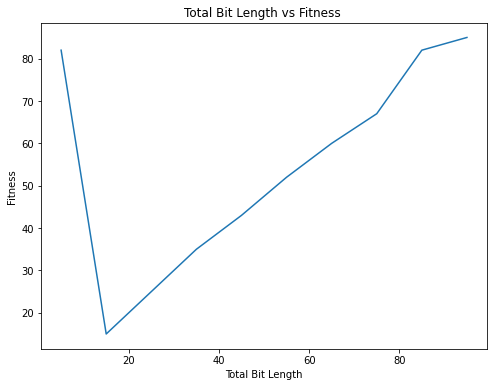

In [27]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=total_fitness[:,0], y=total_fitness[:,1])
# Set plot title and axis labels
plt.title('Total Bit Length vs Fitness ')
plt.xlabel('Total Bit Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

### One Max and Deceptive One Max

In [28]:
import random
import math

def random_bitstring(size):
    return [random.choice(['0', '1']) for _ in range(size)]

def fitness_fn_onemax(bitstring):
    return sum(int(bit) for bit in bitstring)

def fitness_fn_deceptive_one_max(bitstring):
    total_bits = len(bitstring)
    block_size = math.ceil(total_bits / 4)
    fitness = 0
    for i in range(0, total_bits, block_size):
        block = bitstring[i:i+block_size]
        if block.count('0') == block_size:
            fitness += block_size + 1
        else:
            fitness += block.count('1')
    return fitness




def neighbor_fn(bitstring):
    idx = random.randint(0, len(bitstring)-1)
    bit = '0' if bitstring[idx] == '1' else '1'
    return bitstring[:idx] + [bit] + bitstring[idx+1:]

def acceptance_probability(old_fitness, new_fitness, temperature):
    if new_fitness > old_fitness:
        return 1.0
    else:
        return math.exp((new_fitness - old_fitness) / temperature)

def simulated_annealing(problem, fitness_fn, neighbor_fn, max_iterations, max_temperature):
    current, current_fitness = random_bitstring(len(problem)), 0
    if fitness_fn == fitness_fn_onemax:
        current_fitness = fitness_fn(current)
    elif fitness_fn == fitness_fn_deceptive_one_max:
        current_fitness = fitness_fn(current)
    else:
        raise ValueError("Unknown fitness function")
    best, best_fitness = current, current_fitness
    temperature = max_temperature
    for i in range(max_iterations):
        neighbor = neighbor_fn(current)
        if fitness_fn == fitness_fn_onemax:
            neighbor_fitness = fitness_fn(neighbor)
        elif fitness_fn == fitness_fn_deceptive_one_max:
            neighbor_fitness = fitness_fn(neighbor)
        else:
            raise ValueError("Unknown fitness function")
        ap = acceptance_probability(current_fitness, neighbor_fitness, temperature)
        if ap > random.random():
            current, current_fitness = neighbor, neighbor_fitness
            if current_fitness > best_fitness:
                best, best_fitness = current, current_fitness
        temperature *= 0.99
    return (best, best_fitness)
problem = [0, 1, 0, 1, 0, 1, 0, 1]
max_iterations = 1000
max_temperature = 10.0

# One Max
best, best_fitness = simulated_annealing(problem, fitness_fn_onemax, neighbor_fn, max_iterations, max_temperature)
print("One Max:")
print("Best Solution:", best)
print("Best Fitness:", best_fitness)

# Deceptive One Max
best, best_fitness = simulated_annealing(problem, fitness_fn_deceptive_one_max, neighbor_fn, max_iterations, max_temperature)
print("Deceptive One Max:")
print("Best Solution:", best)
print("Best Fitness:", best_fitness)


One Max:
Best Solution: ['1', '1', '1', '1', '1', '1', '1', '1']
Best Fitness: 8
Deceptive One Max:
Best Solution: ['0', '0', '0', '0', '0', '0', '0', '0']
Best Fitness: 12


In [29]:


one_max_list=[]
deceptive_one_list=[]
trap_list=[]
size_list=[]

for problem_size in range(100,5000,500):
    
    problem= [  np.random.randint(1) for i in range(problem_size)]
    
    max_iterations = 1000
    print("Problem_size", problem_size)
    print()
    # Example problem 1: One Max
    print('problem 1: One Max')
    best, best_fitness = simulated_annealing(problem, fitness_fn_onemax, neighbor_fn, max_iterations, max_temperature)
    
    #print('Solution:', solution)
    print('Fitness:', one_max(solution))
    one_max_list.append(best_fitness)
    
    # Example problem 2: Deceptive One Max
    print('problem 2: Deceptive One Max')
    best, best_fitness = simulated_annealing(problem, fitness_fn_deceptive_one_max, neighbor_fn, max_iterations, max_temperature)
    #print('Solution:', solution)
    print('Fitness:', deceptive_one_max(solution))
    deceptive_one_list.append(best_fitness)

    size_list.append(problem_size)
    print()
    print()
    print()



Problem_size 100

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 600

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 1100

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 1600

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 2100

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 2600

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 3100

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 3600

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 4100

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865



Problem_size 4600

problem 1: One Max
Fitness: 1865
problem 2: Deceptive One Max
Fitness: 1865





### One Max

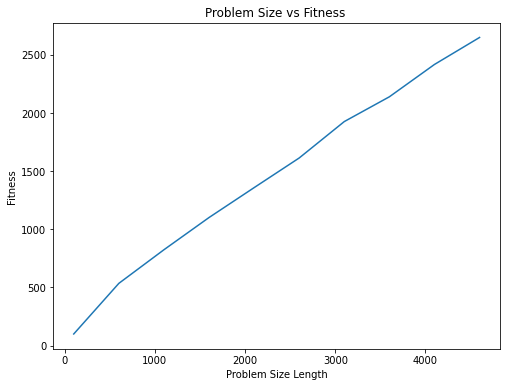

In [30]:

plt.figure(figsize=(8, 6))
sns.lineplot(x=size_list, y=one_max_list)
# Set plot title and axis labels
plt.title('Problem Size vs Fitness ')
plt.xlabel('Problem Size Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

### Deceptive One Max

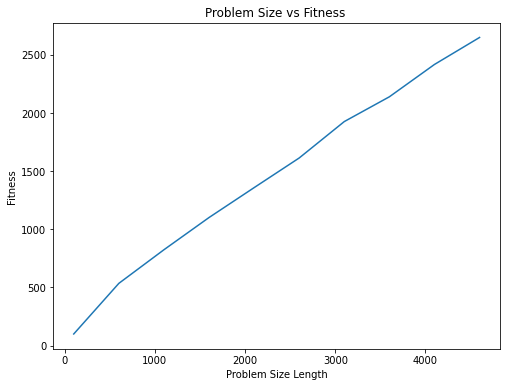

In [31]:

plt.figure(figsize=(8, 6))
sns.lineplot(x=size_list, y=one_max_list)
# Set plot title and axis labels
plt.title('Problem Size vs Fitness ')
plt.xlabel('Problem Size Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

### Trap

In [32]:
import random
import math

def random_bitstring(num_bits):
    return [random.choice(['0', '1']) for _ in range(num_bits)]

def trap(bitstring, k):
    num_blocks = len(bitstring) // k
    blocks = [bitstring[i*k:(i+1)*k] for i in range(num_blocks)]
    fitness = 0
    for block in blocks:
        if '0' not in block:
            fitness += k
        else:
            fitness += k - block.count('0') - 1
    return fitness

def simulated_annealing(problem, k, max_iterations, max_temp, min_temp, cooling_rate):
    current = random_bitstring(len(problem))
    current_fitness = trap(current, k)
    best = current
    best_fitness = current_fitness
    temperature = max_temp
    for i in range(max_iterations):
        next_bitstring = current.copy()
        idx = random.randint(0, len(problem)-1)
        next_bitstring[idx] = '1' if current[idx] == '0' else '0'
        next_fitness = trap(next_bitstring, k)
        delta = next_fitness - current_fitness
        if delta > 0 or math.exp(delta / temperature) > random.random():
            current = next_bitstring
            current_fitness = next_fitness
        if current_fitness > best_fitness:
            best = current
            best_fitness = current_fitness
        temperature *= cooling_rate
        temperature = max(temperature, min_temp)
    return (best, best_fitness)

# Test with Trap problem
problem = [0, 1, 0, 1, 0, 1, 0, 1]
k = 4
max_iterations = 1000
max_temp = 50.0
min_temp = 0.01
cooling_rate = 0.99

best, best_fitness = simulated_annealing(problem, k, max_iterations, max_temp, min_temp, cooling_rate)
print(f"Best bitstring: {best}")
print(f"Best fitness: {best_fitness}")


Best bitstring: ['1', '1', '1', '1', '1', '1', '1', '1']
Best fitness: 8


## Genetic algorithm

### k-color with Genetic Algorithm

In [33]:
import random

def fitness_function(coloring, graph):
    fitness = 0
    for node in range(len(graph)):
        neighbors = graph[node]
        for neighbor in neighbors:
            if coloring[neighbor] != coloring[node]:
                fitness += 1
    return fitness

def generate_random_population(population_size, num_nodes, num_colors):
    population = []
    for i in range(population_size):
        chromosome = [random.randint(0, num_colors-1) for j in range(num_nodes)]
        population.append(chromosome)
    return population

def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1)-1)
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

def mutate(chromosome, mutation_rate, num_colors):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] = random.randint(0, num_colors-1)
    return chromosome

def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [fitness_score/total_fitness for fitness_score in fitness_scores]
    parent1 = random.choices(population, weights=probabilities)[0]
    parent2 = random.choices(population, weights=probabilities)[0]
    return parent1, parent2

def genetic_algorithm(graph, num_colors, population_size=100, max_generations=1000, mutation_rate=0.1):
    num_nodes = len(graph)
    population = generate_random_population(population_size, num_nodes, num_colors)
    for generation in range(max_generations):
        fitness_scores = [fitness_function(chromosome, graph) for chromosome in population]
        best_fitness = max(fitness_scores)
        best_chromosome = population[fitness_scores.index(best_fitness)]
        if best_fitness == num_nodes*(num_nodes-1)/2:
            return best_chromosome, best_fitness
        new_population = [best_chromosome]
        for i in range(population_size-1):
            parent1, parent2 = select_parents(population, fitness_scores)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate, num_colors)
            new_population.append(child)
        population = new_population
    best_fitness = max([fitness_function(chromosome, graph) for chromosome in population])
    best_chromosome = population[fitness_scores.index(best_fitness)]
    return best_chromosome, best_fitness


In [34]:
graph = [[1,2],[0,2,3],[0,1,3],[1,2]]
num_colors = 3
solution, fitness = genetic_algorithm(graph, num_colors)
print("Solution:", solution)
print("Fitness:", fitness)


Solution: [0, 2, 1, 0]
Fitness: 10


## Total Nodes vs Fitness with K=3 colors 

In [35]:

fitness_nodes=[]
k = 3
for total_nodes in range(4,30,5):
    graph=[]
    print("Total Number of Nodes ", total_nodes," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
        
    best_state, best_fitness = genetic_algorithm(graph, k)
    print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,total_nodes])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total Number of Nodes  4  with  3  colors
Best state found: [1, 0, 1, 2]
Best fitness found: 7

Total Number of Nodes  9  with  3  colors
Best state found: [1, 0, 0, 2, 0, 1, 2, 0, 1]
Best fitness found: 26

Total Number of Nodes  14  with  3  colors
Best state found: [1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1]
Best fitness found: 68

Total Number of Nodes  19  with  3  colors
Best state found: [1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2]
Best fitness found: 153

Total Number of Nodes  24  with  3  colors
Best state found: [0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1]
Best fitness found: 223

Total Number of Nodes  29  with  3  colors
Best state found: [1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0]
Best fitness found: 340



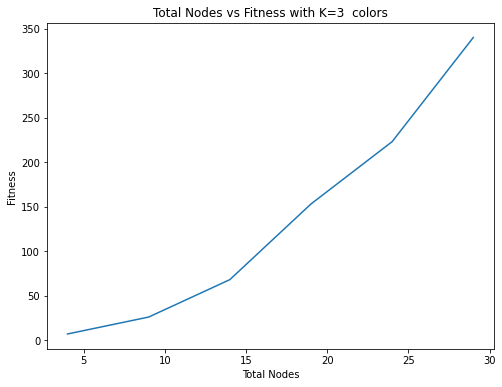

In [36]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total Nodes vs Fitness with K=3  colors')
plt.xlabel('Total Nodes')
plt.ylabel('Fitness')

# Display plot
plt.show()

## Total Nodes vs Fitness with K=20 colors 

In [37]:

fitness_nodes=[]
k = 20
for total_nodes in range(4,30,5):
    graph=[]
    print("Total Number of Nodes ", total_nodes," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
        
    best_state, best_fitness = genetic_algorithm(graph, k)
    print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,total_nodes])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total Number of Nodes  4  with  20  colors
Best state found: [13, 4, 12, 3]
Best fitness found: 10

Total Number of Nodes  9  with  20  colors
Best state found: [7, 12, 15, 1, 18, 16, 4, 13, 1]
Best fitness found: 34

Total Number of Nodes  14  with  20  colors
Best state found: [0, 5, 10, 16, 3, 19, 18, 8, 10, 14, 9, 14, 7, 6]
Best fitness found: 86

Total Number of Nodes  19  with  20  colors
Best state found: [2, 5, 6, 0, 10, 19, 13, 7, 8, 17, 3, 3, 1, 3, 16, 12, 0, 16, 7]
Best fitness found: 149

Total Number of Nodes  24  with  20  colors
Best state found: [13, 5, 8, 18, 17, 11, 12, 7, 4, 15, 6, 0, 3, 5, 1, 16, 7, 15, 9, 18, 2, 10, 2, 8]
Best fitness found: 260

Total Number of Nodes  29  with  20  colors
Best state found: [3, 7, 12, 13, 7, 8, 0, 17, 9, 19, 3, 9, 11, 2, 9, 2, 14, 1, 5, 10, 0, 8, 18, 6, 5, 1, 15, 6, 14]
Best fitness found: 355



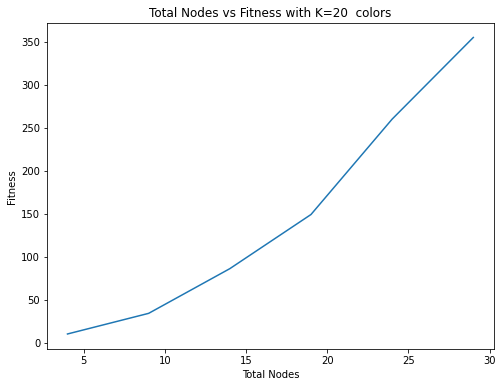

In [38]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total Nodes vs Fitness with K=20  colors')
plt.xlabel('Total Nodes')
plt.ylabel('Fitness')

# Display plot
plt.show()

### Population Size vs Fitness in Genetic Algorithm

In [39]:

fitness_nodes=[]
k = 3
total_nodes=5
for population_size in range(10,500,90):
    graph=[]
    print("Total population_size ", population_size," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
    best_state, best_fitness = genetic_algorithm(graph, k,population_size=population_size)
    print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,population_size])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total population_size  10  with  3  colors
Best state found: [1, 0, 1, 0, 2]
Best fitness found: 11

Total population_size  100  with  3  colors
Best state found: [0, 0, 2, 1, 2]
Best fitness found: 10

Total population_size  190  with  3  colors
Best state found: [0, 0, 1, 1, 2]
Best fitness found: 13

Total population_size  280  with  3  colors
Best state found: [0, 2, 1, 1, 2]
Best fitness found: 13

Total population_size  370  with  3  colors
Best state found: [2, 2, 1, 1, 0]
Best fitness found: 7

Total population_size  460  with  3  colors
Best state found: [0, 1, 1, 2, 2]
Best fitness found: 11



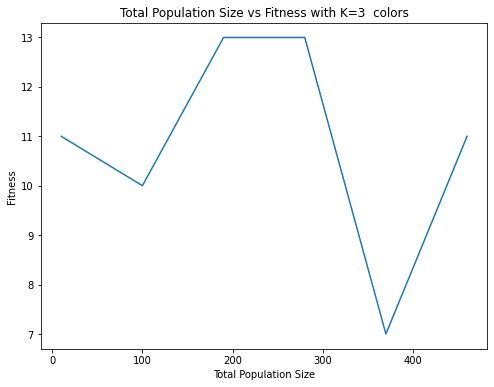

In [40]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total Population Size vs Fitness with K=3  colors')
plt.xlabel('Total Population Size')
plt.ylabel('Fitness')

# Display plot
plt.show()

###  max_generations vs Fitness in Genetic Algorithm

In [41]:

fitness_nodes=[]
k = 3
total_nodes=5
for max_generations in range(4,500,100):
    graph=[]
    print("Total max_generations ", max_generations," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
    best_state, best_fitness = genetic_algorithm(graph, k,max_generations=max_generations)
    print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,max_generations])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total max_generations  4  with  3  colors
Best state found: [0, 0, 1, 1, 2]
Best fitness found: 11

Total max_generations  104  with  3  colors
Best state found: [2, 0, 1, 0, 2]
Best fitness found: 7

Total max_generations  204  with  3  colors
Best state found: [2, 0, 1, 0, 1]
Best fitness found: 9

Total max_generations  304  with  3  colors
Best state found: [0, 2, 0, 2, 1]
Best fitness found: 8

Total max_generations  404  with  3  colors
Best state found: [1, 2, 2, 1, 0]
Best fitness found: 11



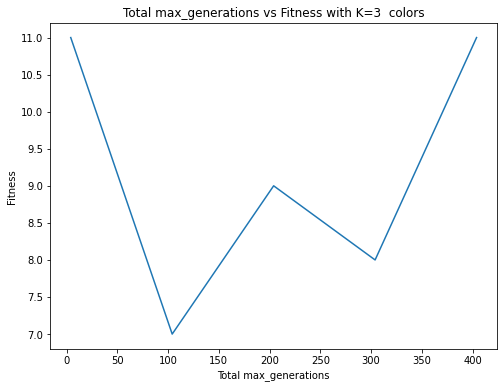

In [42]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total max_generations vs Fitness with K=3  colors')
plt.xlabel('Total max_generations')
plt.ylabel('Fitness')

# Display plot
plt.show()

###  mutation_rate vs Fitness in Genetic Algorithm

In [43]:

fitness_nodes=[]
k = 3
total_nodes=5
for mutation_rate in range(10,100,20):
    mutation_rate=mutation_rate/100
    graph=[]
    print("Total max_generations ", mutation_rate," with ",k," colors"  )
    for i in range(total_nodes):
        random_int=np.random.randint(1,total_nodes)
        nodes=np.random.choice( range(total_nodes), random_int ,replace=False )
        graph.append(nodes)
    best_state, best_fitness = genetic_algorithm(graph, k,mutation_rate=mutation_rate)
    print("Best state found:", best_state)
    print("Best fitness found:", best_fitness)
    fitness_nodes.append([best_fitness,mutation_rate])
    print()
    
fitness_nodes=np.array(fitness_nodes)

Total max_generations  0.1  with  3  colors
Best state found: [2, 1, 0, 2, 0]
Best fitness found: 11

Total max_generations  0.3  with  3  colors
Best state found: [1, 1, 2, 0, 0]
Best fitness found: 7

Total max_generations  0.5  with  3  colors
Best state found: [0, 1, 1, 2, 1]
Best fitness found: 11

Total max_generations  0.7  with  3  colors
Best state found: [0, 1, 2, 2, 2]
Best fitness found: 5

Total max_generations  0.9  with  3  colors
Best state found: [0, 2, 1, 1, 2]
Best fitness found: 8



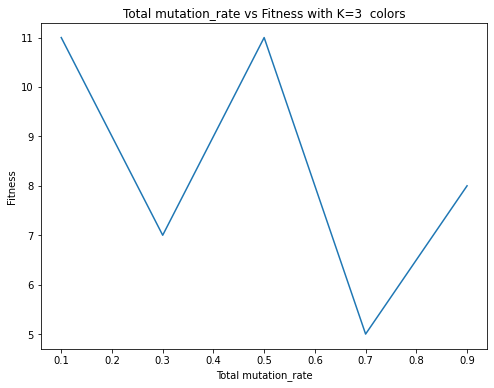

In [44]:
plt.figure(figsize=(8, 6))

sns.lineplot(x=fitness_nodes[:,1], y=fitness_nodes[:,0])

# Set plot title and axis labels
plt.title('Total mutation_rate vs Fitness with K=3  colors')
plt.xlabel('Total mutation_rate')
plt.ylabel('Fitness')

# Display plot
plt.show()

## 4-peak with Genetic Algorithm

In [45]:
import random
import numpy as np

def random_bitstring(size):
    return [random.choice([0, 1]) for _ in range(size)]

def calc_fitness(bitstring):
    length = len(bitstring)
    head = sum(bitstring[:length//2])
    tail = sum(bitstring[length//2:])
    if head == length//2 and tail == length//2:
        return length
    else:
        return max(head, tail)

def tournament_selection(population, fitnesses, tournament_size):
    tournament = random.sample(range(len(population)), tournament_size)
    fitness_tournament = [fitnesses[i] for i in tournament]
    winner = tournament[np.argmax(fitness_tournament)]
    return population[winner]

def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def bit_flip_mutation(bitstring, mutation_rate):
    mutated = list(bitstring)
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = int(not mutated[i])
    return mutated

def genetic_algorithm(problem_size, population_size, generations, tournament_size, crossover_rate, mutation_rate):
    population = [random_bitstring(problem_size) for _ in range(population_size)]
    fitnesses = [calc_fitness(bitstring) for bitstring in population]

    for generation in range(generations):
        new_population = []

        for _ in range(population_size//2):
            parent1 = tournament_selection(population, fitnesses, tournament_size)
            parent2 = tournament_selection(population, fitnesses, tournament_size)

            if random.random() < crossover_rate:
                child1, child2 = single_point_crossover(parent1, parent2)
            else:
                child1, child2 = parent1, parent2

            child1 = bit_flip_mutation(child1, mutation_rate)
            child2 = bit_flip_mutation(child2, mutation_rate)

            new_population.append(child1)
            new_population.append(child2)

        population = new_population
        fitnesses = [calc_fitness(bitstring) for bitstring in population]

    return max(fitnesses)

# Testing on 4-peaks problem
problem_size = 10
population_size = 100
generations = 100
tournament_size = 5
crossover_rate = 0.9
mutation_rate = 1.0/problem_size

fitness = genetic_algorithm(problem_size, population_size, generations, tournament_size, crossover_rate, mutation_rate)

print("Fitness score: ", fitness)


Fitness score:  10


### 4-peaks optimization problem: Fitness vs  Bit Length

Fitness:  5

Fitness:  15

Fitness:  13

Fitness:  17

Fitness:  23

Fitness:  27

Fitness:  31

Fitness:  34

Fitness:  40

Fitness:  41



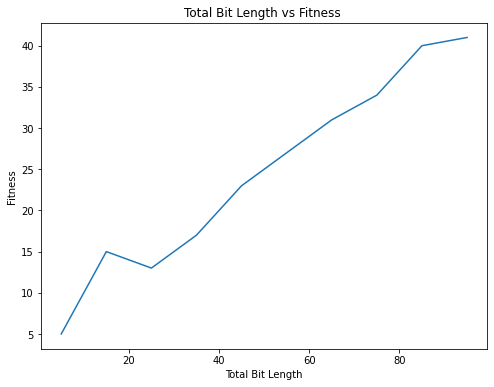

In [46]:
total_fitness=[]

for bit_string_length in range(5,100,10):
    
    fitness = genetic_algorithm(bit_string_length, population_size, generations, tournament_size, crossover_rate, mutation_rate)
    total_fitness.append([bit_string_length,fitness])
    #print("Optimal Bit String: ", bit_string)
    print("Fitness: ", fitness)
    print()
    
total_fitness=np.array(total_fitness)


plt.figure(figsize=(8, 6))
sns.lineplot(x=total_fitness[:,0], y=total_fitness[:,1])
# Set plot title and axis labels
plt.title('Total Bit Length vs Fitness ')
plt.xlabel('Total Bit Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

### 4-peaks optimization problem: population_size vs  Bit Length

Fitness:  48

Fitness:  47

Fitness:  48

Fitness:  48

Fitness:  48

Fitness:  48



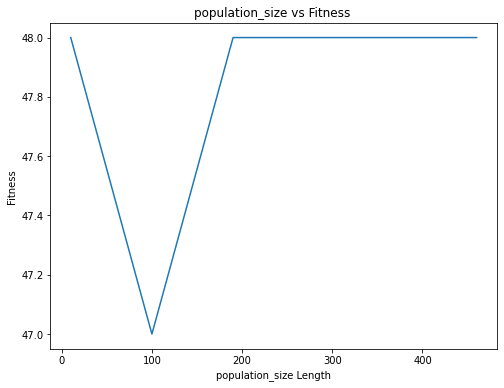

In [47]:
total_fitness=[]

for population_size in range(10,500,90):
    
    problem_size = 50
    generations = 100
    tournament_size = 5
    crossover_rate = 0.9
    mutation_rate = 1.0/problem_size
    
    
    fitness = genetic_algorithm(bit_string_length, population_size, generations, tournament_size, crossover_rate, mutation_rate)
    total_fitness.append([population_size,fitness])
    #print("Optimal Bit String: ", bit_string)
    print("Fitness: ", fitness)
    print()
    
total_fitness=np.array(total_fitness)


plt.figure(figsize=(8, 6))
sns.lineplot(x=total_fitness[:,0], y=total_fitness[:,1])
# Set plot title and axis labels
plt.title('population_size vs Fitness ')
plt.xlabel('population_size Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

Fitness:  25

Fitness:  25

Fitness:  25

Fitness:  25

Fitness:  25

Fitness:  25

Fitness:  25

Fitness:  25

Fitness:  25



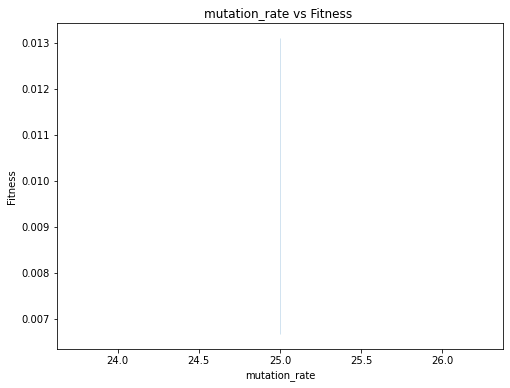

In [50]:
total_fitness=[]
bit_string_length=50
problem_size = 10
population_size = 100


for factor in range(10,100,10):
    factor=factor/100
    problem_size = 50
    population_size = 100
    generations = 100
    tournament_size = 5
    crossover_rate = 0.9
    mutation_rate = factor*(1.0/problem_size)
    fitness = genetic_algorithm(bit_string_length, population_size, generations, tournament_size, crossover_rate, mutation_rate)
    total_fitness.append([fitness,mutation_rate])
    #print("Optimal Bit String: ", bit_string)
    print("Fitness: ", fitness)
    print()
    
total_fitness=np.array(total_fitness)


plt.figure(figsize=(8, 6))
sns.lineplot(x=total_fitness[:,0], y=total_fitness[:,1])
# Set plot title and axis labels
plt.title('mutation_rate vs Fitness ')
plt.xlabel('mutation_rate')
plt.ylabel('Fitness')
# Display plot
plt.show()

## MIMIC

### MaxKColor

length  5
fitness  (array([0, 0, 0, 0, 0]), 6.0)

length  10
fitness  (array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1]), 6.0)

length  15
fitness  (array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1]), 6.0)

length  20
fitness  (array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]), 6.0)

length  25
fitness  (array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0]), 6.0)

length  30
fitness  (array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0]), 6.0)

length  35
fitness  (array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]), 6.0)

length  40
fitness  (array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]), 6.0)

length  45
fitness  (array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

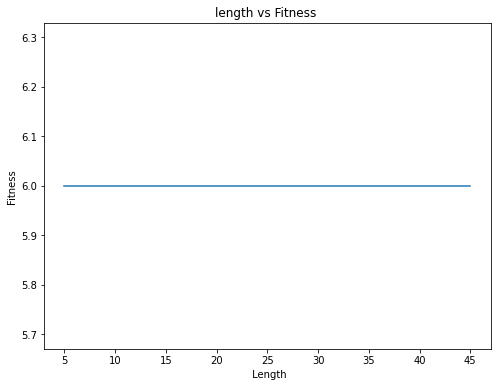

In [44]:
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
fitness = mlrose.MaxKColor(edges)
fitness_list=[]
for length in range(5,50,5):
    print("length ",length)
    problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness)
    fit_=mlrose.mimic(problem)
    print("fitness ",fit_)
    fitness_list.append(fit_[-1])
    
    print()
    
    

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(5,50,5), y=fitness_list)
# Set plot title and axis labels
plt.title('length vs Fitness ')
plt.xlabel(' Length')
plt.ylabel('Fitness')
# Display plot
plt.show()

### FourPeaks

length  5
fitness  (array([1, 1, 1, 1, 1]), 6.0)

length  10
fitness  (array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1]), 6.0)

length  15
fitness  (array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]), 6.0)

length  20
fitness  (array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]), 6.0)

length  25
fitness  (array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0]), 6.0)

length  30
fitness  (array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0]), 6.0)

length  35
fitness  (array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]), 6.0)

length  40
fitness  (array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]), 6.0)

length  45
fitness  (array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,

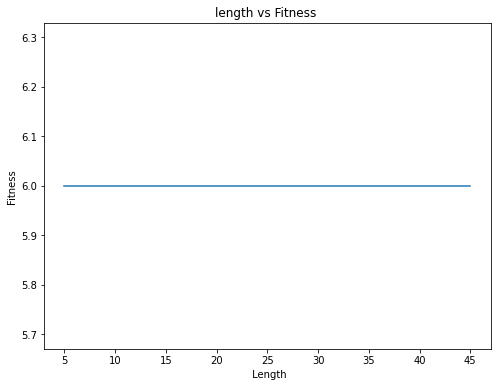

In [45]:
fitness = mlrose.FourPeaks(t_pct=0.15)


edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
fitness = mlrose.MaxKColor(edges)
fitness_list=[]
for length in range(5,50,5):
    print("length ",length)
    problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness)
    fit_=mlrose.mimic(problem)
    print("fitness ",fit_)
    fitness_list.append(fit_[-1])
    
    print()
    
    

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(5,50,5), y=fitness_list)
# Set plot title and axis labels
plt.title('length vs Fitness ')
plt.xlabel(' Length')
plt.ylabel('Fitness')
# Display plot
plt.show()









### OneMax

length  5
fitness  (array([1, 1, 1, 1, 1]), 6.0)

length  10
fitness  (array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1]), 6.0)

length  15
fitness  (array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]), 6.0)

length  20
fitness  (array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]), 6.0)

length  25
fitness  (array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1]), 6.0)

length  30
fitness  (array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0]), 6.0)

length  35
fitness  (array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1]), 6.0)

length  40
fitness  (array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]), 6.0)

length  45
fitness  (array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

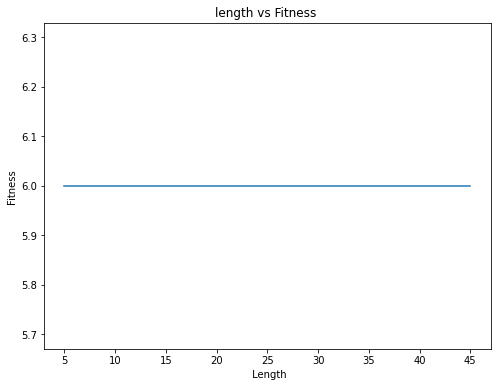

In [51]:
fitness = mlrose.OneMax()


edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
fitness = mlrose.MaxKColor(edges)
fitness_list=[]
for length in range(5,50,5):
    print("length ",length)
    problem = mlrose.DiscreteOpt(length = length, fitness_fn = fitness)
    fit_=mlrose.mimic(problem)
    print("fitness ",fit_)
    fitness_list.append(fit_[-1])
    
    print()
    
    

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(5,50,5), y=fitness_list)
# Set plot title and axis labels
plt.title('length vs Fitness ')
plt.xlabel(' Length')
plt.ylabel('Fitness')
# Display plot
plt.show()







### One Max

In [51]:
import random
import numpy as np

def one_max_fitness(x):
    return sum(x)

def generate_population(size, length):
    return [np.random.randint(0, 2, size=length) for _ in range(size)]

def select(population, fitness_fn, num_parents):
    parents = []
    for _ in range(num_parents):
        fitnesses = [fitness_fn(x) for x in population]
        idx = np.random.choice(len(population), p=fitnesses/sum(fitnesses))
        parents.append(population[idx])
    return parents

def crossover(parents, crossover_prob):
    children = []
    for i in range(0, len(parents), 2):
        parent1 = parents[i]
        parent2 = parents[i+1]
        if random.random() < crossover_prob:
            crossover_point = random.randint(1, len(parent1) - 1)
            child1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
            child2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
            children.append(child1)
            children.append(child2)
        else:
            children.append(parent1)
            children.append(parent2)
    return children

def mutate(children, mutation_prob):
    for i in range(len(children)):
        for j in range(len(children[i])):
            if random.random() < mutation_prob:
                children[i][j] = 1 - children[i][j]
    return children

def mimic(fitness_fn, length, pop_size, num_parents, crossover_prob, mutation_prob, num_iters):
    population = generate_population(pop_size, length)
    for i in range(num_iters):
        parents = select(population, fitness_fn, num_parents)
        children = crossover(parents, crossover_prob)
        children = mutate(children, mutation_prob)
        population = children
        best_fitness = max([fitness_fn(x) for x in population])
        print(f"Iteration {i+1}, Best Fitness: {best_fitness}")
    return population

if __name__ == '__main__':
    length = 50
    pop_size = 100
    num_parents = 10
    crossover_prob = 0.8
    mutation_prob = 0.01
    num_iters = 50

    population = mimic(one_max_fitness, length, pop_size, num_parents, crossover_prob, mutation_prob, num_iters)


Iteration 1, Best Fitness: 32
Iteration 2, Best Fitness: 32
Iteration 3, Best Fitness: 32
Iteration 4, Best Fitness: 31
Iteration 5, Best Fitness: 31
Iteration 6, Best Fitness: 32
Iteration 7, Best Fitness: 32
Iteration 8, Best Fitness: 33
Iteration 9, Best Fitness: 34
Iteration 10, Best Fitness: 33
Iteration 11, Best Fitness: 33
Iteration 12, Best Fitness: 32
Iteration 13, Best Fitness: 32
Iteration 14, Best Fitness: 35
Iteration 15, Best Fitness: 35
Iteration 16, Best Fitness: 33
Iteration 17, Best Fitness: 29
Iteration 18, Best Fitness: 29
Iteration 19, Best Fitness: 29
Iteration 20, Best Fitness: 30
Iteration 21, Best Fitness: 30
Iteration 22, Best Fitness: 30
Iteration 23, Best Fitness: 30
Iteration 24, Best Fitness: 30
Iteration 25, Best Fitness: 30
Iteration 26, Best Fitness: 30
Iteration 27, Best Fitness: 29
Iteration 28, Best Fitness: 30
Iteration 29, Best Fitness: 29
Iteration 30, Best Fitness: 28
Iteration 31, Best Fitness: 28
Iteration 32, Best Fitness: 28
Iteration 33, Bes

### Deceptive One Max

In [52]:
import numpy as np

def generate_population(population_size, chromosome_length):
    population = np.random.randint(0, 2, size=(population_size, chromosome_length))
    return population

def calculate_fitness(population):
    fitness = np.zeros((population.shape[0],))
    for i in range(population.shape[0]):
        fitness[i] = np.sum(population[i])
    return fitness

def select_population(population, fitness, percentile):
    fitness_threshold = np.percentile(fitness, percentile)
    selected_indices = np.where(fitness >= fitness_threshold)[0]
    selected_population = population[selected_indices]
    return selected_population

def get_mutated_population(selected_population):
    mutated_population = selected_population.copy()
    for i in range(mutated_population.shape[0]):
        index = np.random.randint(0, mutated_population.shape[1])
        mutated_population[i][index] = 1 - mutated_population[i][index]
    return mutated_population

def mimic(population_size, chromosome_length, percentile, max_iterations):
    population = generate_population(population_size, chromosome_length)
    iteration = 0
    best_fitness = 0
    while iteration < max_iterations:
        fitness = calculate_fitness(population)
        selected_population = select_population(population, fitness, percentile)
        mutated_population = get_mutated_population(selected_population)
        population = np.vstack((selected_population, mutated_population))
        iteration += 1
        best_fitness = max(best_fitness, np.max(fitness))
        print("Iteration:", iteration, "Best Fitness:", best_fitness)
    return best_fitness


In [ ]:
best_fitness = mimic(population_size=100, chromosome_length=50, percentile=50, max_iterations=50)
print("Best Fitness:", best_fitness)


Iteration: 1 Best Fitness: 31.0
Iteration: 2 Best Fitness: 32.0
Iteration: 3 Best Fitness: 32.0
Iteration: 4 Best Fitness: 32.0
Iteration: 5 Best Fitness: 33.0
Iteration: 6 Best Fitness: 33.0
Iteration: 7 Best Fitness: 34.0
Iteration: 8 Best Fitness: 34.0
Iteration: 9 Best Fitness: 35.0
Iteration: 10 Best Fitness: 36.0
Iteration: 11 Best Fitness: 37.0
Iteration: 12 Best Fitness: 37.0
Iteration: 13 Best Fitness: 37.0
Iteration: 14 Best Fitness: 38.0
Iteration: 15 Best Fitness: 38.0
Iteration: 16 Best Fitness: 39.0
Iteration: 17 Best Fitness: 39.0
Iteration: 18 Best Fitness: 40.0
Iteration: 19 Best Fitness: 40.0
Iteration: 20 Best Fitness: 40.0
Iteration: 21 Best Fitness: 41.0
Iteration: 22 Best Fitness: 41.0
Iteration: 23 Best Fitness: 42.0
Iteration: 24 Best Fitness: 43.0
Iteration: 25 Best Fitness: 43.0
Iteration: 26 Best Fitness: 44.0
Iteration: 27 Best Fitness: 44.0
Iteration: 28 Best Fitness: 44.0
Iteration: 29 Best Fitness: 45.0
Iteration: 30 Best Fitness: 45.0
Iteration: 31 Best 

## Heart Disease Dataset

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
df = pd.read_csv('heart.csv')
X,y=np.array(df[df.columns[:-1]]),np.array(df[df.columns[-1]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## random_hill_climb

###  random_hill_climb by varying learning rate 

In [67]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation =   'sigmoid', \
algorithm = 'random_hill_climb', max_iters = 1000, 
bias = True, is_classifier = True, learning_rate = 0.0001, 
early_stopping = True, clip_max = 5, max_attempts =10, random_state = 3)
nn_model1.fit(X_train, y_train)

y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print("y_train_accuracy",y_train_accuracy*100)
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print("y_test_accuracy",y_test_accuracy*100)

print("loss",nn_model1.loss)


y_train_accuracy 36.77685950413223
y_test_accuracy 32.78688524590164
loss 0.8068315068427148


learning rate  0.001
y_test_accuracy 44
loss 0.7632162746610691
learning rate  0.01
y_test_accuracy 44
loss 0.7529039923115495
learning rate  1
y_test_accuracy 79
loss 0.5867853156119994
learning rate  2
y_test_accuracy 79
loss 0.639419636105621
learning rate  5
y_test_accuracy 82
loss 0.5655389913807076
learning rate  10
y_test_accuracy 84
loss 0.5766565613113709


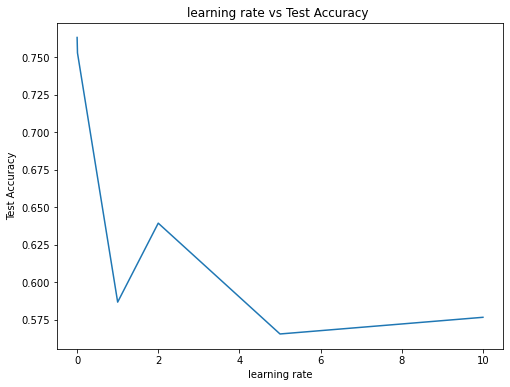

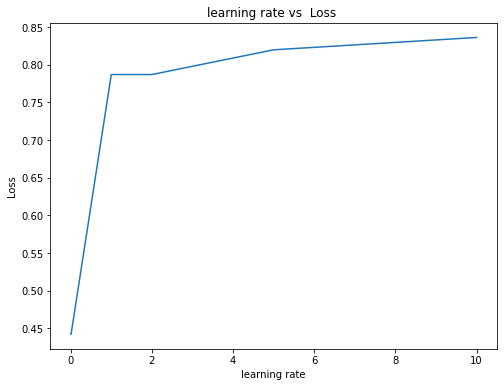

In [68]:

ls_loss_acc=[]

for lr in  [0.001,0.01,1,2,5,10]:
    print("learning rate ",lr)
    
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10,20,100,10], activation =   'sigmoid', \
    algorithm = 'random_hill_climb', max_iters = 1000, 
    bias = True, is_classifier = True, learning_rate = lr, 
    early_stopping = True, clip_max = 5, max_attempts =10, random_state = 3)
    nn_model1.fit(X_train, y_train)

    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("y_test_accuracy",round(y_test_accuracy*100))
    loss=nn_model1.loss
    print("loss",loss)
    ls_loss_acc.append([loss,y_test_accuracy])
    del nn_model1
    
ls_loss_acc=np.array(ls_loss_acc)

plt.figure(figsize=(8, 6))
sns.lineplot(x=[0.001,0.01,1,2,5,10], y=ls_loss_acc[:,0])
# Set plot title and axis labels
plt.title('learning rate vs Test Accuracy ')
plt.xlabel('learning rate')
plt.ylabel('Test Accuracy')
# Display plot
plt.show()


plt.figure(figsize=(8, 6))
sns.lineplot(x=[0.001,0.01,1,2,5,10], y=ls_loss_acc[:,1])
# Set plot title and axis labels
plt.title('learning rate vs  Loss ')
plt.xlabel('learning rate')
plt.ylabel('Loss')
# Display plot
plt.show()

## simulated annealing with neural network

### simulated annealing by varying learning rate 

learning rate  0.001
y_test_accuracy 44
loss 0.7640000060765303
learning rate  0.01
y_test_accuracy 44
loss 0.7600842717689391
learning rate  1
y_test_accuracy 82
loss 0.59839274004706
learning rate  2
y_test_accuracy 84
loss 0.4526251331331122
learning rate  5
y_test_accuracy 74
loss 0.46177903885000277
learning rate  10
y_test_accuracy 80
loss 0.498765073287227


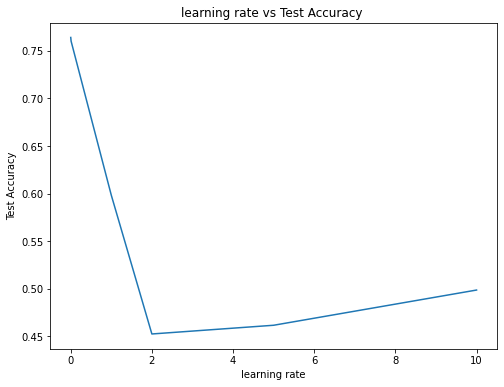

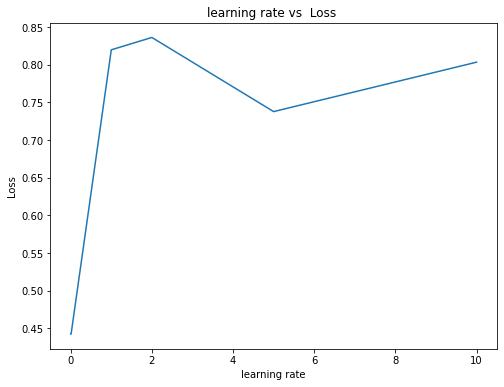

In [69]:

ls_loss_acc=[]

for lr in  [0.001,0.01,1,2,5,10]:
    print("learning rate ",lr)
    
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10,20,100,10], activation =   'sigmoid', \
    algorithm = 'simulated_annealing', max_iters = 1000, 
    bias = True, is_classifier = True, learning_rate = lr, 
    early_stopping = True, clip_max = 5, max_attempts =10, random_state = 3)
    nn_model1.fit(X_train, y_train)

    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("y_test_accuracy",round(y_test_accuracy*100))
    loss=nn_model1.loss
    print("loss",loss)
    ls_loss_acc.append([loss,y_test_accuracy])
    del nn_model1
    
ls_loss_acc=np.array(ls_loss_acc)

plt.figure(figsize=(8, 6))
sns.lineplot(x=[0.001,0.01,1,2,5,10], y=ls_loss_acc[:,0])
# Set plot title and axis labels
plt.title('learning rate vs Test Accuracy ')
plt.xlabel('learning rate')
plt.ylabel('Test Accuracy')
# Display plot
plt.show()


plt.figure(figsize=(8, 6))
sns.lineplot(x=[0.001,0.01,1,2,5,10], y=ls_loss_acc[:,1])
# Set plot title and axis labels
plt.title('learning rate vs  Loss ')
plt.xlabel('learning rate')
plt.ylabel('Loss')
# Display plot
plt.show()

## Genetic Algorithm with Neural Network

### Genetic Algorithm by varying learning rate 

learning rate  0.001
y_test_accuracy 79
loss 0.7146019561697269
learning rate  0.01
y_test_accuracy 79
loss 0.7146019561697269
learning rate  1
y_test_accuracy 79
loss 0.7146019561697269
learning rate  2
y_test_accuracy 79
loss 0.7146019561697269
learning rate  5
y_test_accuracy 79
loss 0.7146019561697269
learning rate  10
y_test_accuracy 79
loss 0.7146019561697269


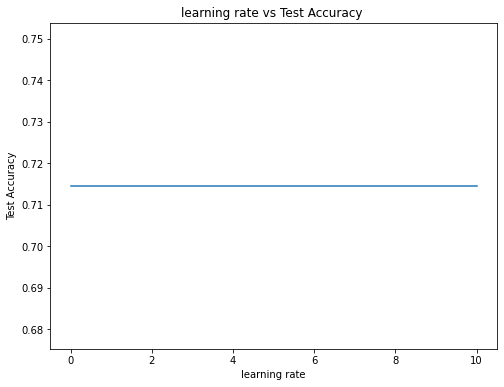

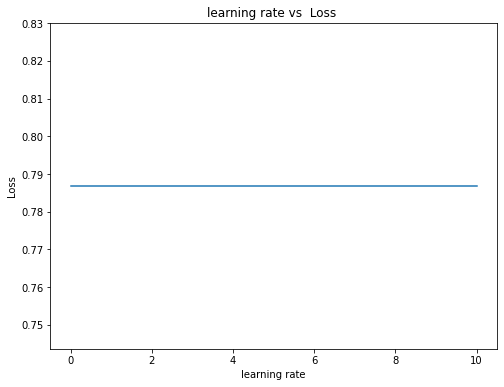

In [70]:

ls_loss_acc=[]

for lr in  [0.001,0.01,1,2,5,10]:
    print("learning rate ",lr)
    
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10,20,100,10], activation =   'sigmoid', \
    algorithm = 'genetic_alg', max_iters = 1000, 
    bias = True, is_classifier = True, learning_rate = lr, 
    early_stopping = True, clip_max = 5, max_attempts =10, random_state = 3)
    nn_model1.fit(X_train, y_train)

    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("y_test_accuracy",round(y_test_accuracy*100))
    loss=nn_model1.loss
    print("loss",loss)
    ls_loss_acc.append([loss,y_test_accuracy])
    del nn_model1
    
ls_loss_acc=np.array(ls_loss_acc)

plt.figure(figsize=(8, 6))
sns.lineplot(x=[0.001,0.01,1,2,5,10], y=ls_loss_acc[:,0])
# Set plot title and axis labels
plt.title('learning rate vs Test Accuracy ')
plt.xlabel('learning rate')
plt.ylabel('Test Accuracy')
# Display plot
plt.show()


plt.figure(figsize=(8, 6))
sns.lineplot(x=[0.001,0.01,1,2,5,10], y=ls_loss_acc[:,1])
# Set plot title and axis labels
plt.title('learning rate vs  Loss ')
plt.xlabel('learning rate')
plt.ylabel('Loss')
# Display plot
plt.show()

### Genetic Algorithm by varying mutation_prob

mutation_prob  10
y_test_accuracy 79
loss 0.7146019561697269
mutation_prob  10
y_test_accuracy 70
loss 0.672439010197233
mutation_prob  10
y_test_accuracy 82
loss 0.6105800767829405
mutation_prob  10
y_test_accuracy 61
loss 0.6496961965712661


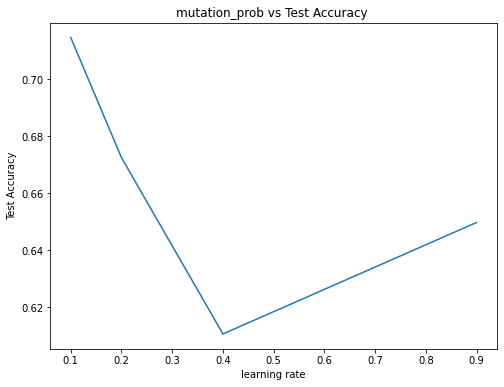

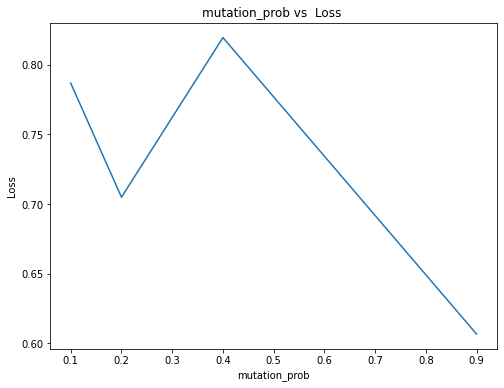

In [71]:

ls_loss_acc=[]

for mutation_prob in  [0.1,0.2,0.4,0.9]:
    print("mutation_prob ",lr)
    
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10,20,100,10], activation =   'sigmoid', \
    algorithm = 'genetic_alg', max_iters = 1000, 
    bias = True, is_classifier = True, learning_rate = lr, 
    early_stopping = True, clip_max = 5, max_attempts =10, random_state = 3,mutation_prob=mutation_prob)
    nn_model1.fit(X_train, y_train)

    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("y_test_accuracy",round(y_test_accuracy*100))
    loss=nn_model1.loss
    print("loss",loss)
    ls_loss_acc.append([loss,y_test_accuracy])
    del nn_model1
    
ls_loss_acc=np.array(ls_loss_acc)

plt.figure(figsize=(8, 6))
sns.lineplot(x= [0.1,0.2,0.4,0.9], y=ls_loss_acc[:,0])
# Set plot title and axis labels
plt.title('mutation_prob vs Test Accuracy ')
plt.xlabel('learning rate')
plt.ylabel('Test Accuracy')
# Display plot
plt.show()


plt.figure(figsize=(8, 6))
sns.lineplot(x= [0.1,0.2,0.4,0.9], y=ls_loss_acc[:,1])
# Set plot title and axis labels
plt.title('mutation_prob vs  Loss ')
plt.xlabel('mutation_prob')
plt.ylabel('Loss')
# Display plot
plt.show()

### Genetic Algorithm by varying pop_size

pop_size  10
y_test_accuracy 51
loss 0.9335244433541786
pop_size  10
y_test_accuracy 56
loss 0.743822976114746
pop_size  10
y_test_accuracy 67
loss 0.6787490614888871
pop_size  10
y_test_accuracy 66
loss 0.6077470936432597
pop_size  10
y_test_accuracy 66
loss 0.634533507145464


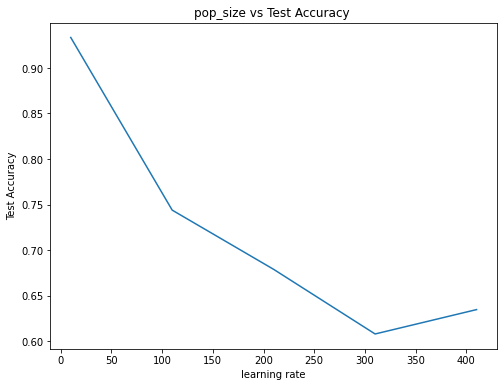

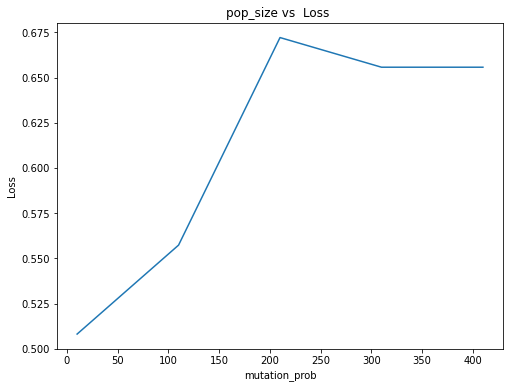

In [72]:

ls_loss_acc=[]

for pop_size in  range(10,500,100):
    print("pop_size ",lr)
    
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10,20,100,10], activation =   'sigmoid', \
    algorithm = 'genetic_alg', max_iters = 1000, 
    bias = True, is_classifier = True, learning_rate = lr, 
    early_stopping = True, clip_max = 5, max_attempts =10, random_state = 3,pop_size=pop_size)
    nn_model1.fit(X_train, y_train)

    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("y_test_accuracy",round(y_test_accuracy*100))
    loss=nn_model1.loss
    print("loss",loss)
    ls_loss_acc.append([loss,y_test_accuracy])
    del nn_model1
    
ls_loss_acc=np.array(ls_loss_acc)

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(10,500,100), y=ls_loss_acc[:,0])
# Set plot title and axis labels
plt.title('pop_size vs Test Accuracy ')
plt.xlabel('learning rate')
plt.ylabel('Test Accuracy')
# Display plot
plt.show()


plt.figure(figsize=(8, 6))
sns.lineplot(x=range(10,500,100), y=ls_loss_acc[:,1])
# Set plot title and axis labels
plt.title('pop_size vs  Loss ')
plt.xlabel('mutation_prob')
plt.ylabel('Loss')
# Display plot
plt.show()

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/pygad/pygad.py:860: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


Generation = 1
Accuracy   = 54.45544554455446
Generation = 2
Accuracy   = 56.43564356435643
Generation = 3
Accuracy   = 56.43564356435643
Generation = 4
Accuracy   = 58.08580858085809
Generation = 5
Accuracy   = 58.08580858085809
Generation = 6
Accuracy   = 58.08580858085809
Generation = 7
Accuracy   = 58.08580858085809
Generation = 8
Accuracy   = 58.08580858085809
Generation = 9
Accuracy   = 58.08580858085809
Generation = 10
Accuracy   = 58.415841584158414
Generation = 11
Accuracy   = 58.415841584158414
Generation = 12
Accuracy   = 58.415841584158414
Generation = 13
Accuracy   = 58.415841584158414
Generation = 14
Accuracy   = 60.726072607260726
Generation = 15
Accuracy   = 60.726072607260726
Generation = 16
Accuracy   = 60.726072607260726
Generation = 17
Accuracy   = 61.05610561056105
Generation = 18
Accuracy   = 61.05610561056105
Generation = 19
Accuracy   = 61.05610561056105
Generation = 20
Accuracy   = 61.05610561056105
Generation = 21
Accuracy   = 61.05610561056105
Generation = 22

/home/honyaelfayoumy/anaconda3/lib/python3.9/site-packages/pygad/pygad.py:3591: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


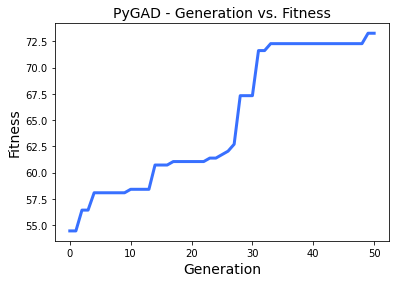

[-3.24018265e-01  1.98850686e-01 -3.73561820e-01 -9.14712014e-01
  2.30846467e-01  5.30605385e-01  5.19815770e-01 -2.27527152e+00
  4.97534493e-03  8.96254761e-02  1.65502684e-02  5.15493659e-02
 -7.10897919e-04  6.73443616e-01  7.64995999e-01 -3.61611672e-03
  8.03972790e-02 -7.24799563e-02 -2.61269403e-01  6.98495189e-02
 -7.55545498e-02  9.39465311e-01 -8.34638705e-01 -1.10855063e-01
 -8.11204636e-02  6.32658177e-02  2.22264367e-02  2.14731856e-02
  1.15312278e-01 -3.13512445e-02]
73.26732673267327
0


In [73]:
import numpy
import pygad
import pygad.nn
import pygad.gann

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}".format(fitness=ga_instance.best_solution()[1]))

data_inputs = X

data_outputs = y

GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=13,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

ga_instance = pygad.GA(num_generations=50, 
                       num_parents_mating=3, 
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)